# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
import pandas as pd
 
    
#data = pd.DataFrame.from_csv('./data/Bryant et al 2010.csv',
                             #index_col=False)
df = pd.read_csv(r'./data/Bryant et al 2010.csv')

df.fillna(df.mean())
df.dropna()

x = df.iloc[:, 2:11]
y = df.iloc[:, 15]

In [2]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

c:\users\marko\appdata\local\programs\python\python38\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
c:\users\marko\appdata\local\programs\python\python38\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


<Logger EMA (DEBUG)>

In [3]:
import numpy as np

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


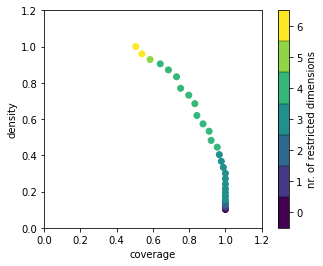

In [4]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


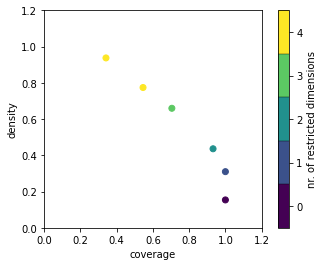

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4


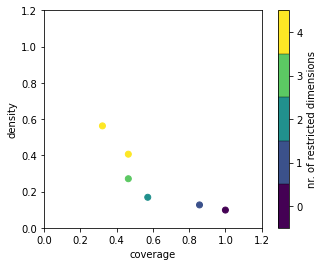

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4


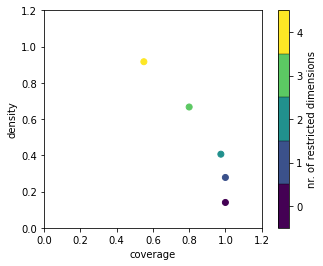

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4


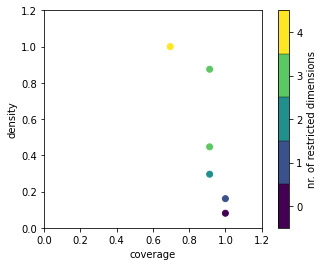

[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.4583333333333333, mass: 0.08391608391608392, coverage: 0.5789473684210527, density: 0.4583333333333333 restricted_dimensions: 3


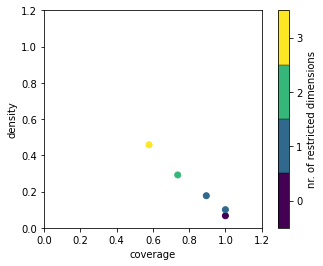

'\n\n##SSP1 threshold: 0.9375\n##SSP2 threshold: 0.5625\n##SSP3 threshold: 0.9166\n##SSP4 threshold: 0.5594\n##SSP5 threshold: 0.4583 \n\n\n'

In [5]:
import ema_workbench

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv(r'./data/Rozenberg et al 2014.csv')

x = df.iloc[:, 0:7]
y = df.iloc[:, 7:15]

for key in y:
    prim_alg = prim.Prim(x, y[key], threshold=0.45, peel_alpha=0.1)
    box = prim_alg.find_box()
    box.show_tradeoff()
    plt.show()

##Apply the preprocessor 
#prim.pca_preprocess(experiments, y, subsets=None, exclude={})

'''

##SSP1 threshold: 0.9375
##SSP2 threshold: 0.5625
##SSP3 threshold: 0.9166
##SSP4 threshold: 0.5594
##SSP5 threshold: 0.4583 


'''

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function.
Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?

[MainProcess/INFO] results loaded succesfully from C:\Users\marko\Documents\GitHub\epa1361_open_g29\Week 3-4 - vulnerability analysis\data\Hamarat et al 2013.gz
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.7121771217712177, mass: 0.0542, coverage: 0.22158438576349024, density: 0.7121771217712177 restricted_dimensions: 10


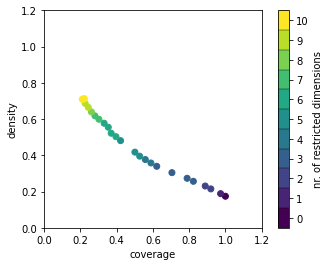

In [6]:
import ema_workbench
from ema_workbench import util
from ema_workbench.analysis import prim
from ema_workbench import ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

df = './data/Hamarat et al 2013.gz'
experiments, outcomes = util.load_results(df)

y = outcomes['fraction renewables'][:,-1] < outcomes['fraction renewables'][:,0]
prim_alg = prim.Prim(experiments, y, threshold=0.70, peel_alpha=0.1)
box = prim_alg.find_box()
box.show_tradeoff()
plt.show()

Our PRIM does not appear to have any struggles.


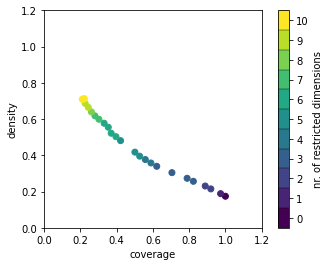

In [7]:
import pandas as pd
import numpy as np

y = outcomes['fraction renewables'][:,-1] < outcomes['fraction renewables'][:,0]           
x = experiments.select_dtypes(include=np.number)

preprocess = ema_workbench.analysis.prim.pca_preprocess(x, y, subsets=None)
box.show_tradeoff()
plt.show()

Our PRIM does not appear to have any struggles.

no difference in this case